**IMPORTING MODULES**

Numpy: For Mathematical Operations

Pandas: For Dataframe Manipulation

Matplotlib: For Data Visullization 


In [15]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np


**MNIST** ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In [16]:
df=pd.read_csv('handwritten.csv')

In [17]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

**Initialization Dimensions**

In [18]:
df=np.array(df)
m,n=df.shape
np.random.shuffle(df)
data_dev=df[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]
 
data_train=df[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]

X_train=X_train/255
_,m_train = X_train.shape

def init_para():
    w1=np.random.rand(10,784)-0.5 #to get values between 0.5 and -0.5
    b1=np.random.rand(10,1)-0.5
    w2=np.random.rand(10,10)-0.5 #to get values between 0.5 and -0.5
    b2=np.random.rand(10,1)-0.5
    return w1,b1,w2,b2


In [19]:
Y_train

array([4, 1, 1, ..., 1, 7, 8])

**Building The Neural Network**

In [20]:

def relu(z1):
    return np.maximum(z1,0)


def softmax(z):
    expZ = np.exp(z - np.max(z))
    return expZ / expZ.sum(axis=0, keepdims=True)


def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = relu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


def one_hot(z):
    one_hot=np.zeros((z.size,z.max()+1)) #initializes a tuple of 0s , z.max()+1 assumes classes are from 0 to 9
    one_hot[np.arange(z.size),z]=1#initializes an array of training examples of 0s to labels. 
    #for each row , moves through the column specified and set it to 1
    return one_hot.T

def relu_deriv(z):
    return z>0


def backprop(z1,a1,z2,a2,w1,w2,X,y):
    m-y.size
    one_hot_y=one_hot(y)
    dz2=a2-one_hot_y
    dw2=1/m*(dz2.dot(a1.T))
    db2=1/m*(np.sum(dz2,axis=1,keepdims=True))
    dz1=w2.T.dot(dz2) * relu_deriv(z1)

    dw1=1/m*(dz1.dot(X.T))
    db1=1/m*(np.sum(dz1,axis=1,keepdims=True))

    return dw1,db1, dw2,db2

def update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha):
    w1=w1-alpha*dw1
    b1=b1-alpha*db1
    w2=w2-alpha*dw2
    b2=b2-alpha*db2
    return w1,b1,w2,b2


In [21]:
def get_predict(a2):
    return np.argmax(a2,0)#returns indexes of max value in each column

def accuracy(prediction,y):
    
    return np.sum(prediction==y)/y.size


def gradiant_descent(X,y,iterations,alpha):
    w1,b1,w2,b2=init_para()
    for i in range(iterations):
        z1,a1,z2,a2=forward_prop(w1,b1,w2,b2,X)
        dw1,db1,dw2,db2=backprop(z1,a1,z2,a2,w1,w2,X,y)
        w1,b1,w2,b2=update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha)
        prediction=get_predict(a2)
        
    print("accuracy",accuracy(prediction,y)*100)

    return w1,b1,w2,b2

    

**Model Training**

Training the model with 1300 Iterations and a learning rate of 0.1

In [28]:
w1,b1,w2,b2=gradiant_descent(X_train,Y_train,1300,0.1)


accuracy 88.81463414634146


In [30]:
def make_prediction(X,w1,b1,w2,b2):
    _,_,_,A2=forward_prop(w1,b1,w2,b2,X)
    prediction=get_predict(A2)
    return prediction

def test(index,w1,b1,w2,b2):
    current=X_dev[:,index,None]
    prediction=make_prediction(current,w1,b1,w2,b2)
    label=Y_dev[index]
    print("prediction:",prediction)
    plt.figure(figsize=(3,3))
    current=current.reshape((28,28))*255
    plt.cm.gray
    plt.imshow(current,cmap='inferno',interpolation='nearest')
    plt.show()

prediction: [4]


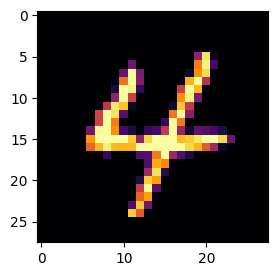

prediction: [4]


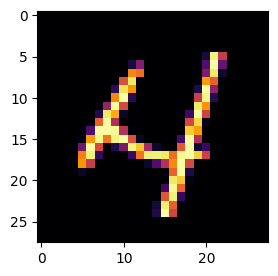

prediction: [9]


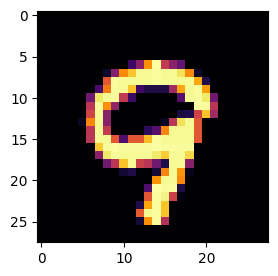

prediction: [1]


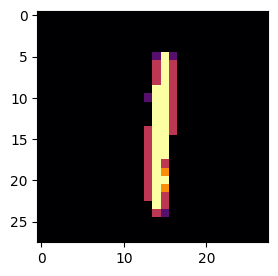

prediction: [8]


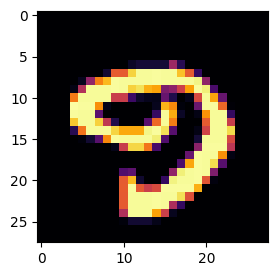

prediction: [0]


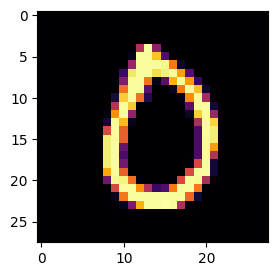

prediction: [1]


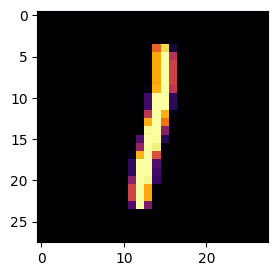

prediction: [6]


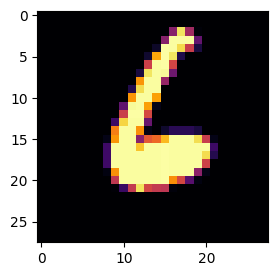

prediction: [3]


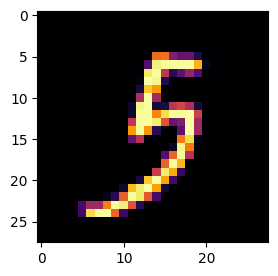

prediction: [9]


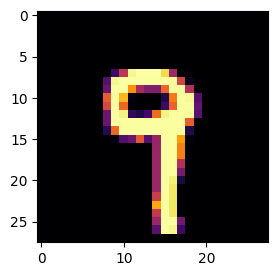

prediction: [7]


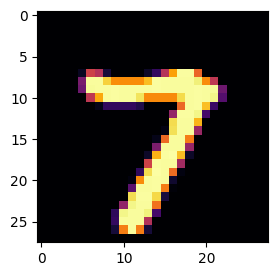

prediction: [5]


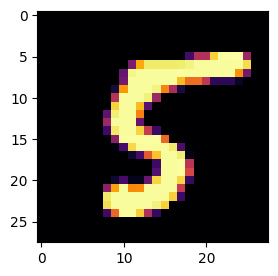

prediction: [6]


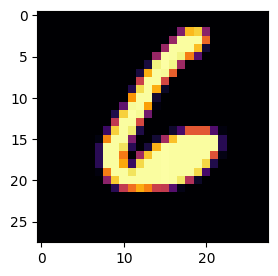

prediction: [9]


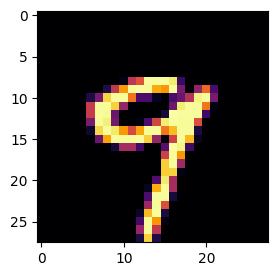

prediction: [6]


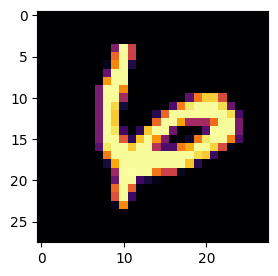

prediction: [1]


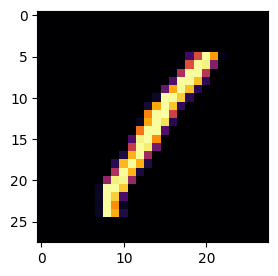

prediction: [9]


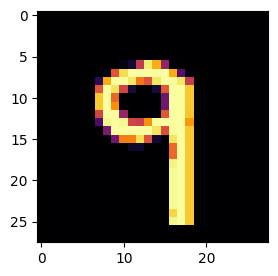

prediction: [3]


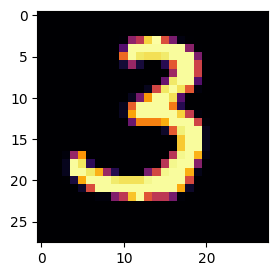

prediction: [7]


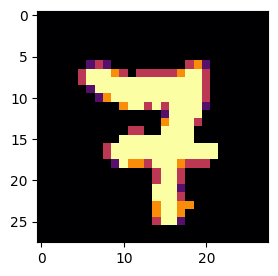

prediction: [7]


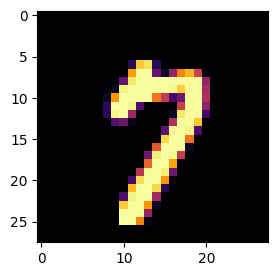

prediction: [6]


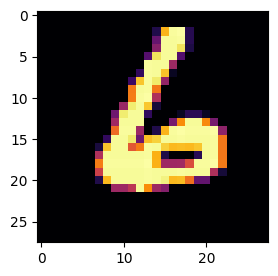

prediction: [3]


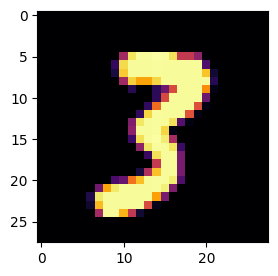

In [32]:
for i in range(22):
    test(i,w1,b1,w2,b2)
